<a href="https://colab.research.google.com/github/Vineet179/Wind_Power_Generator/blob/main/dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Location2.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Location2.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'Location2.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


Data Shape: (43800, 10)

Data Types:
 Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object

Summary Statistics:
        temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        42.725605            69.085091     32.215932       4.693236   
std         23.724354            17.317481     21.307625       2.238572   
min        -31.200000            16.000000    -36.200000       0.000000   
25%         26.100000            56.000000     18.600000       3.010000   
50%         42.700000            71.000000     32.000000       4.440000   
75%         63.000000            83.000000     50.600000       6.040000   
max         95.4

array([[<Axes: title={'center': 'temperature_2m'}>,
        <Axes: title={'center': 'relativehumidity_2m'}>,
        <Axes: title={'center': 'dewpoint_2m'}>],
       [<Axes: title={'center': 'windspeed_10m'}>,
        <Axes: title={'center': 'windspeed_100m'}>,
        <Axes: title={'center': 'winddirection_10m'}>],
       [<Axes: title={'center': 'winddirection_100m'}>,
        <Axes: title={'center': 'windgusts_10m'}>,
        <Axes: title={'center': 'Power'}>]], dtype=object)

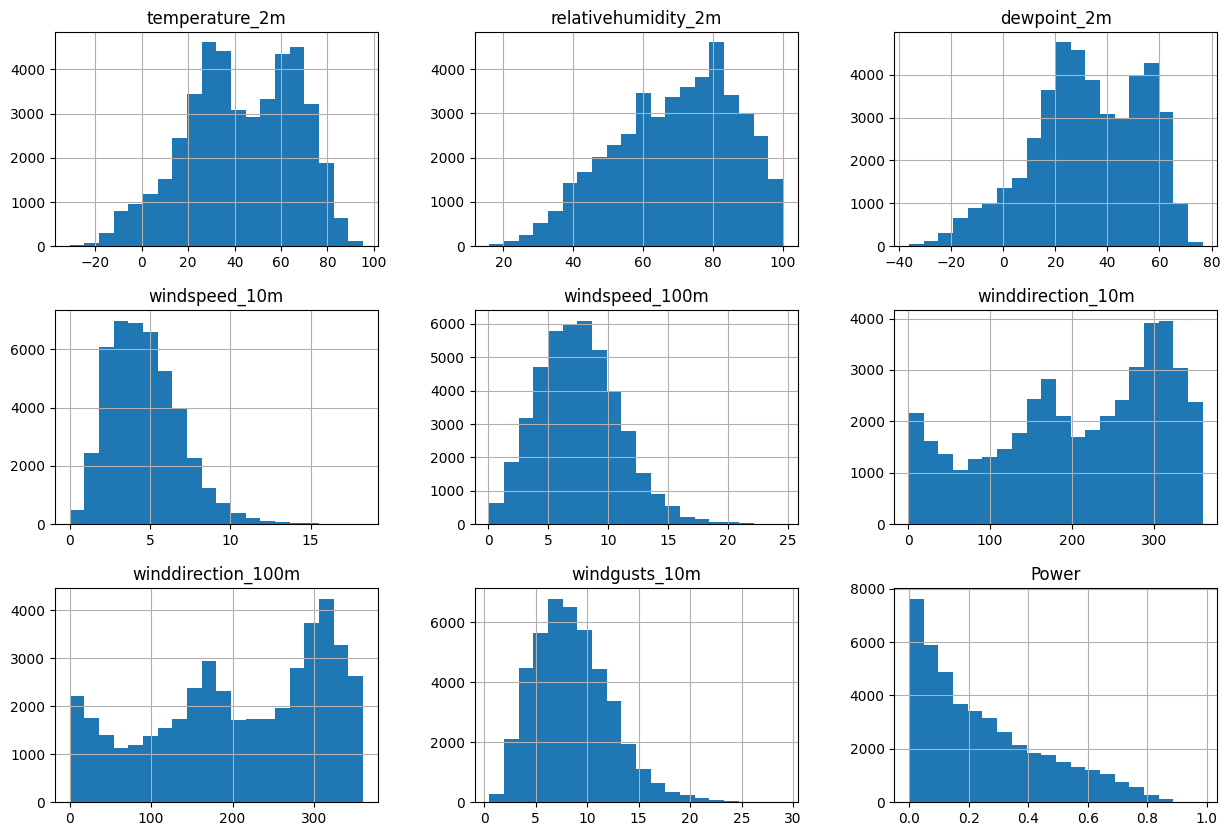

In [ ]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Initial Data Visualization (Histograms for numerical features)
df.hist(figsize=(15, 10), bins=20)

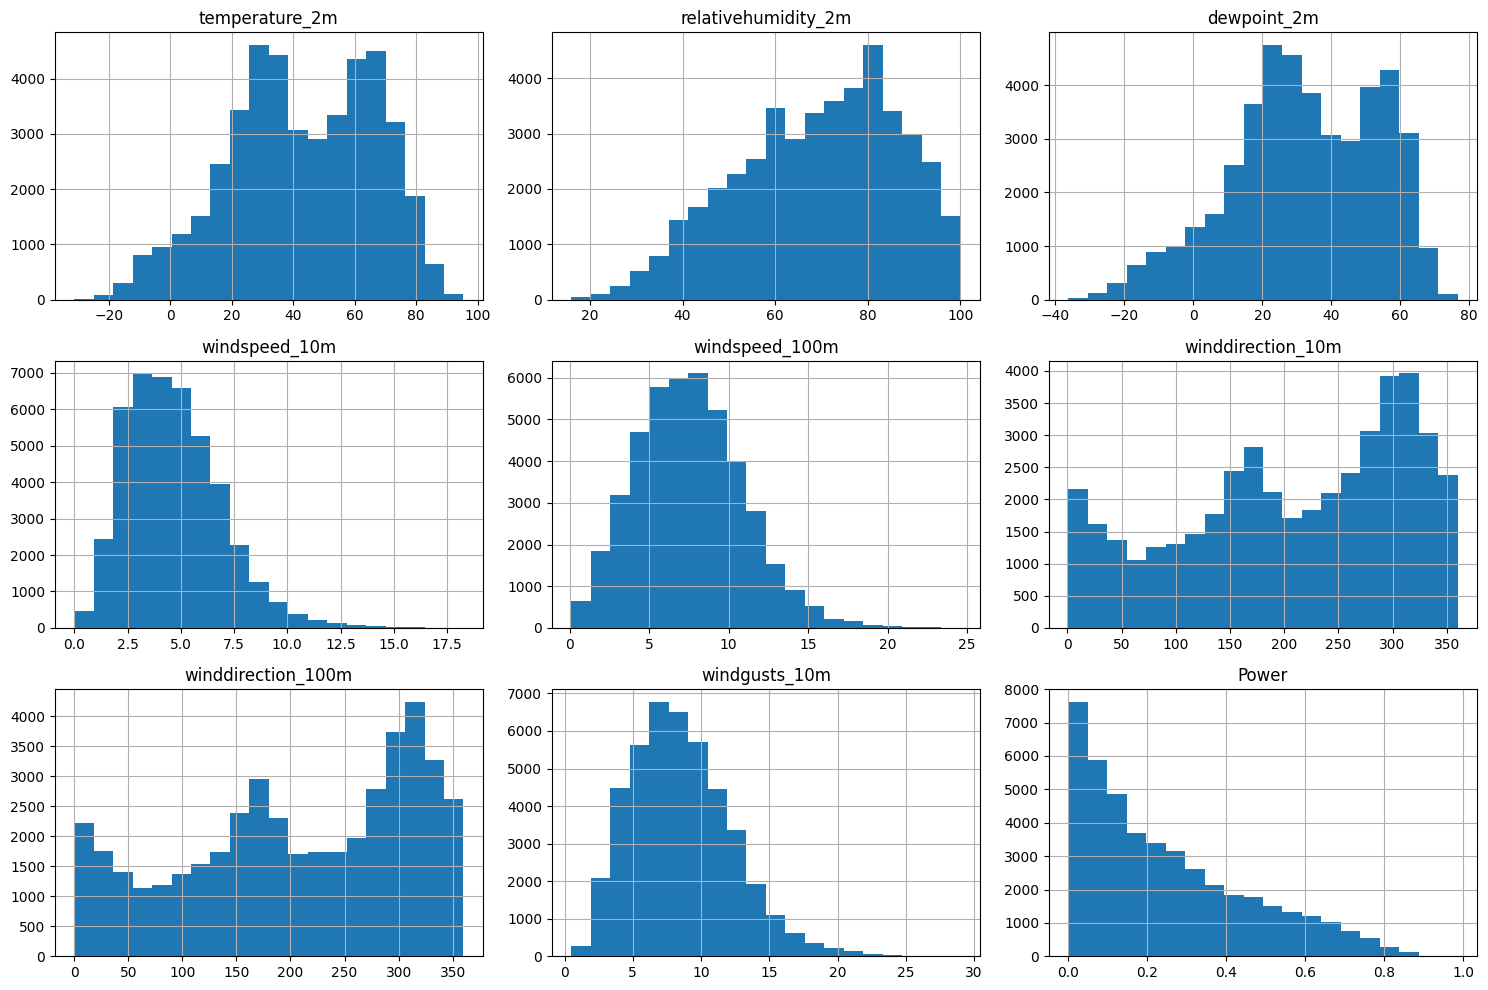

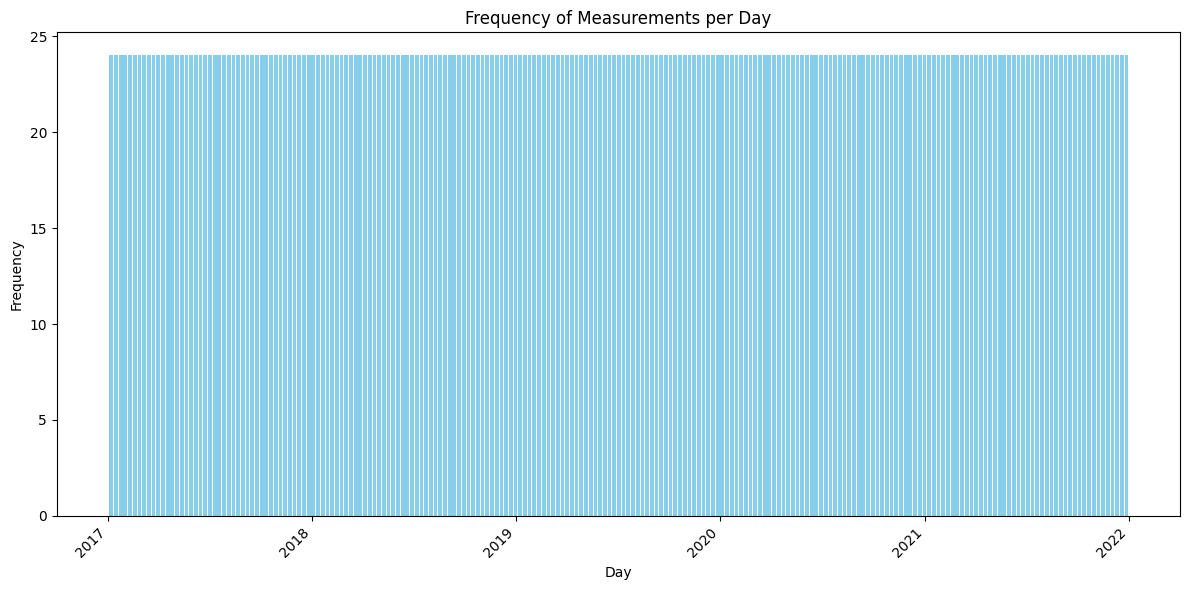

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Time' to datetime objects
df['Time'] = pd.to_datetime(df['Time'])

# Histograms for numerical features
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'Power']
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.savefig('numerical_feature_histograms.png')
plt.show()


# Bar chart for 'Time' (aggregated by day)
# Aggregate by day.
df['Day'] = df['Time'].dt.date
daily_counts = df.groupby('Day')['Time'].count()

plt.figure(figsize=(12, 6))
plt.bar(daily_counts.index, daily_counts.values, color='skyblue')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Frequency of Measurements per Day')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('time_frequency_bar_chart.png')
plt.show()

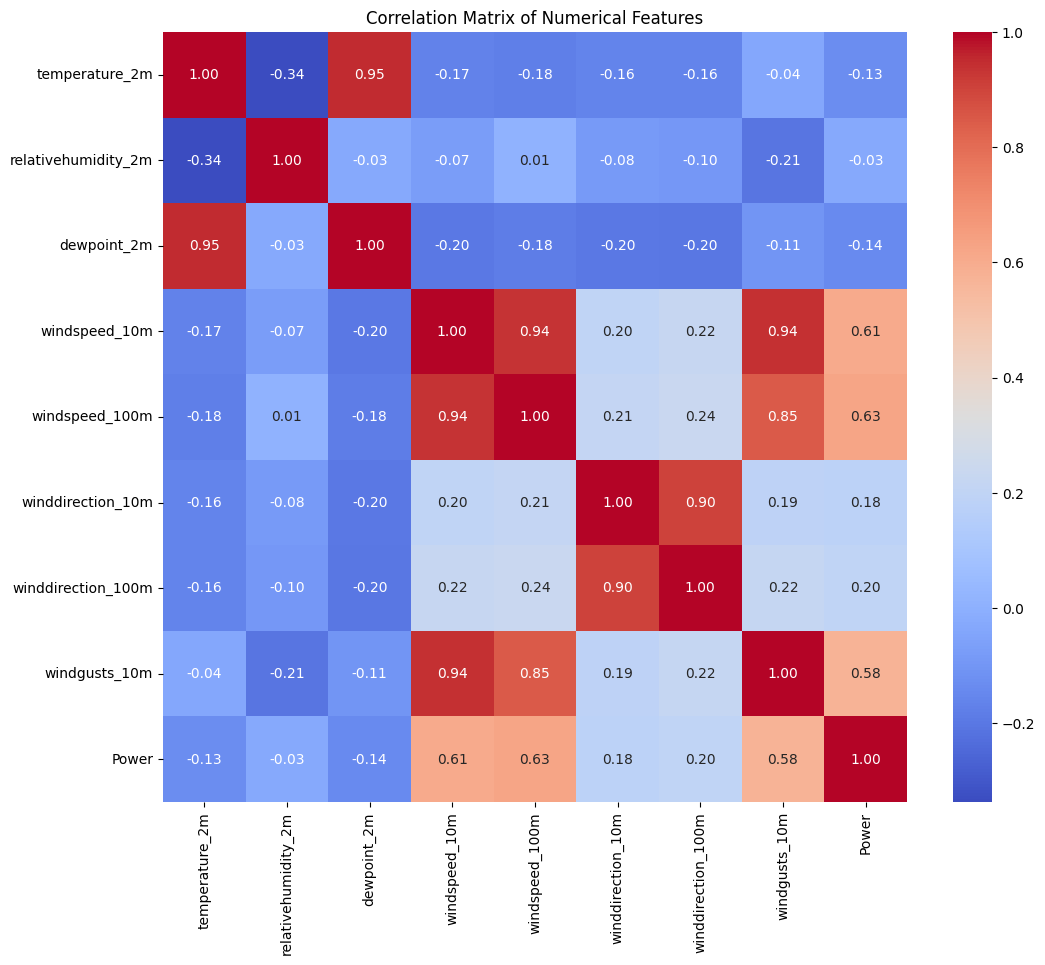

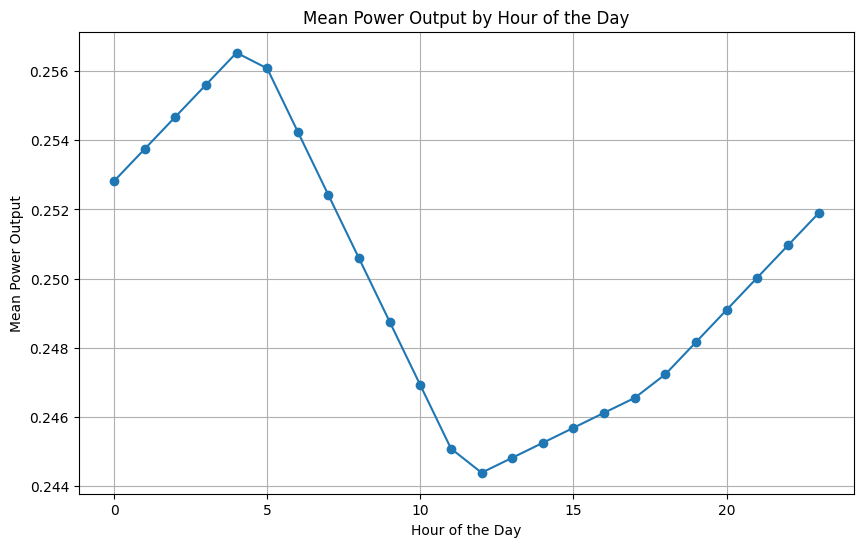

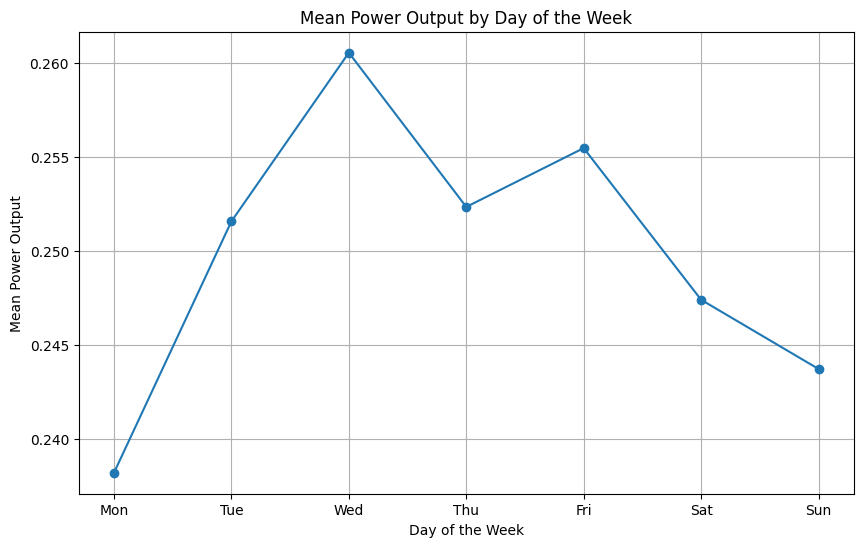

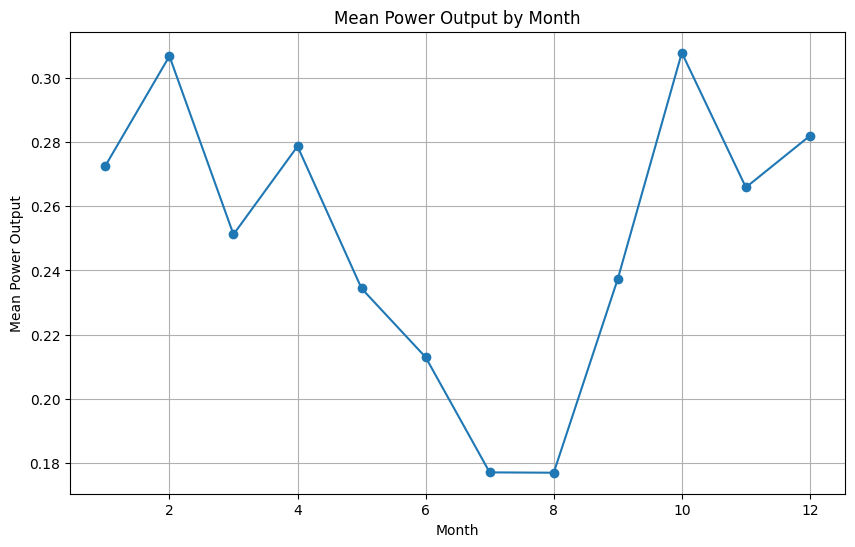

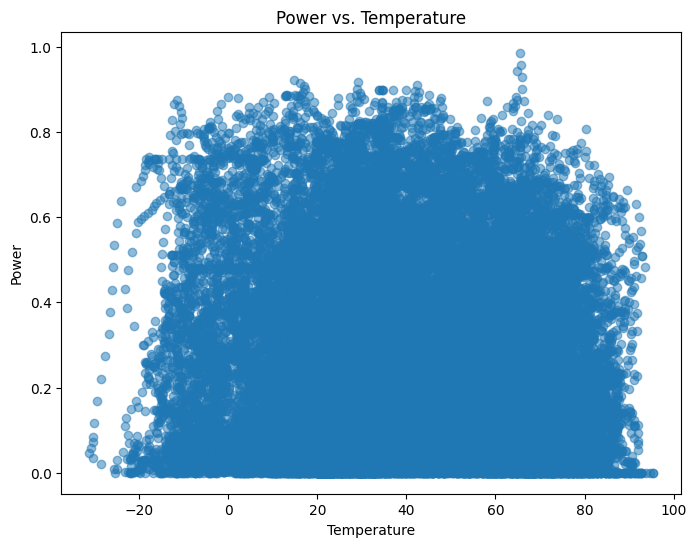

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Day' and 'Time' columns before calculating the correlation matrix
df_corr = df.drop(['Day', 'Time'], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze the distribution of the 'Time' feature and its relationship with 'Power'
# Group data by hour of the day
hourly_power = df.groupby(df['Time'].dt.hour)['Power'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_power.index, hourly_power.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Power Output')
plt.title('Mean Power Output by Hour of the Day')
plt.grid(True)
plt.show()

# Group data by day of the week
daily_power = df.groupby(df['Time'].dt.dayofweek)['Power'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(days, daily_power.values, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Power Output')
plt.title('Mean Power Output by Day of the Week')
plt.grid(True)
plt.show()

# Group data by month
monthly_power = df.groupby(df['Time'].dt.month)['Power'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_power.index, monthly_power.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Mean Power Output')
plt.title('Mean Power Output by Month')
plt.grid(True)
plt.show()

# Investigate relationship between 'Power' and other numerical features
# (Example:  'temperature_2m' -  adjust based on correlation matrix findings)
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['Power'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Power vs. Temperature')
plt.show()